# Import data from DB.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfOrg = pd.read_csv('hope_dataset_cleaned.csv')  

print(dfOrg.shape[0])

1243


In [3]:
dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,FISTULA PERITONEAL,male,27395425,2018,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",1.0
1,75.0,FISTULA PERITONEAL,male,28560554,2018,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
2,75.0,FISTULA PERITONEAL,male,28641726,2017,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
3,75.0,FISTULA PERITONEAL,male,26245344,2016,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
4,75.0,FISTULA PERITONEAL,male,28942543,2018,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
5,75.0,FISTULA PERITONEAL,male,24782153,2014,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
6,75.0,FISTULA PERITONEAL,male,28002229,2018,9,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
7,75.0,FISTULA PERITONEAL,male,27505109,2017,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
8,75.0,FISTULA PERITONEAL,male,24850546,2015,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
9,75.0,FISTULA PERITONEAL,male,29371050,2019,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN


# Transform (factorice) from Categories to continuous atributes

Transform 'pedido.data.attributes.diagnostic_main' atribute

In [4]:
dataDiagnosticMain, categoriesDiagnosticMain = pd.factorize(dfOrg['pedido.data.attributes.diagnostic_main'])

dfOrg['pedido.data.attributes.diagnostic_main'] = dataDiagnosticMain

Transform 'gender' atribute

In [5]:
dataGender, categoriesGender = pd.factorize(dfOrg['pedido.data.attributes.gender'])

dfOrg['pedido.data.attributes.gender'] = dataGender

Transform 'respuesta.pubmed_keys' atribute

In [6]:
categoriesORGPubMedKeys = dfOrg['respuesta.pubmed_keys'].value_counts()

print("total: " + str(categoriesORGPubMedKeys.size))

total: 80


In [7]:
dataPubMedKeys, categoriesPubMedKeys = pd.factorize(dfOrg['respuesta.pubmed_keys'])

dfOrg['respuesta.pubmed_keys'] = dataPubMedKeys

In [8]:
dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,0,0,27395425,2018,1,0,1.0
1,75.0,0,0,28560554,2018,4,0,NaN
2,75.0,0,0,28641726,2017,12,0,NaN
3,75.0,0,0,26245344,2016,12,0,NaN
4,75.0,0,0,28942543,2018,6,0,NaN
5,75.0,0,0,24782153,2014,6,0,NaN
6,75.0,0,0,28002229,2018,9,0,NaN
7,75.0,0,0,27505109,2017,4,0,NaN
8,75.0,0,0,24850546,2015,1,0,NaN
9,75.0,0,0,29371050,2019,4,0,NaN


In [9]:
print("age NaN => " + str(dfOrg[pd.isnull(dfOrg['pedido.data.attributes.age'])].shape[0]))
print("diagnostic_main NaN => " + str(dfOrg[pd.isnull(dfOrg['pedido.data.attributes.diagnostic_main'])].shape[0]))
print("gender NaN => " + str(dfOrg[pd.isnull(dfOrg['pedido.data.attributes.gender'])].shape[0]))
print("articulo NaN => " + str(dfOrg[pd.isnull(dfOrg['articulo'])].shape[0]))
print("articlesRevisedYear NaN => " + str(dfOrg[pd.isnull(dfOrg['respuesta.articlesRevisedYear'])].shape[0]))
print("articlesRevisedMonth NaN => " + str(dfOrg[pd.isnull(dfOrg['respuesta.articlesRevisedMonth'])].shape[0]))
print("pubmed_keys NaN => " + str(dfOrg[pd.isnull(dfOrg['respuesta.pubmed_keys'])].shape[0]))
print("utilidad NaN => " + str(dfOrg[pd.isnull(dfOrg['utilidad'])].shape[0]))

age NaN => 10
diagnostic_main NaN => 0
gender NaN => 0
articulo NaN => 0
articlesRevisedYear NaN => 0
articlesRevisedMonth NaN => 0
pubmed_keys NaN => 0
utilidad NaN => 1192


Remove row with age eq NaN

In [10]:
dfOrg = dfOrg[pd.notnull(dfOrg['pedido.data.attributes.age'])]

# Standardize the Data

Choosed "age", "diagnostic_main", "year", "pubmed_keys" and "articulo" attributes (based on PCA_V2 study)

In [11]:
from sklearn.preprocessing import StandardScaler

features = ["pedido.data.attributes.age",
    "pedido.data.attributes.diagnostic_main",
    "respuesta.articlesRevisedYear",
    "respuesta.pubmed_keys",
    "articulo"]

# Separating out the features
x = dfOrg.loc[:, features].values

featuresTransformed = StandardScaler().fit_transform(x)

dfStandarized = pd.DataFrame(featuresTransformed, index=dfOrg.index, columns=features)
dfStandarized['utilidad'] = dfOrg['utilidad']

dfStandarized

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,respuesta.articlesRevisedYear,respuesta.pubmed_keys,articulo,utilidad
0,1.443474,-1.360638,0.643671,-1.650220,-0.221939,1.0
1,1.443474,-1.360638,0.643671,-1.650220,0.137839,NaN
2,1.443474,-1.360638,0.224418,-1.650220,0.162904,NaN
3,1.443474,-1.360638,-0.194835,-1.650220,-0.577070,NaN
4,1.443474,-1.360638,0.643671,-1.650220,0.255793,NaN
...,...,...,...,...,...,...
1238,-0.429381,-0.580827,-0.194835,1.520816,0.574852,NaN
1239,-0.429381,-0.580827,1.062924,1.520816,-0.540973,NaN
1240,-0.429381,-0.580827,-0.614089,1.520816,0.801912,NaN
1241,-0.429381,-0.580827,1.062924,1.520816,-0.056202,NaN


# Separe data by utilidad is defined

In [12]:
dfDataSetComplete = dfStandarized[pd.notnull(dfStandarized['utilidad'])]

print(dfDataSetComplete.shape[0])

dfDataSetToPredict = dfStandarized[pd.isnull(dfStandarized['utilidad'])]

print(dfDataSetToPredict.shape[0])

51
1182


# SVM

We check the number of results

In [13]:
 dfDataSetComplete.groupby('utilidad').size()

utilidad
0.0    21
1.0    30
dtype: int64

Separe "utilidad" atribute from dataToTrain

In [14]:
X = np.array(dfDataSetComplete.drop(['utilidad'],1))
y = np.array(dfDataSetComplete['utilidad'])
X.shape

(51, 5)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Text(0.5, 0, 'X')

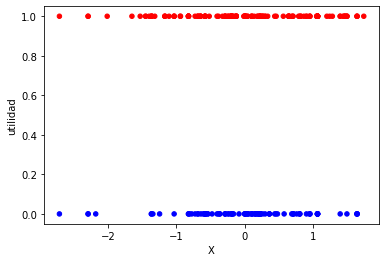

In [16]:
ax = dfDataSetComplete.plot.scatter(x="pedido.data.attributes.age", y="utilidad", c=dfDataSetComplete.utilidad.map({0:'b', 1:'r'}))
dfDataSetComplete.plot.scatter(x="pedido.data.attributes.diagnostic_main", y="utilidad", c=dfDataSetComplete.utilidad.map({0:'b', 1:'r'}), ax=ax)
dfDataSetComplete.plot.scatter(x="respuesta.articlesRevisedYear", y="utilidad", c=dfDataSetComplete.utilidad.map({0:'b', 1:'r'}), ax=ax)
dfDataSetComplete.plot.scatter(x="respuesta.pubmed_keys", y="utilidad", c=dfDataSetComplete.utilidad.map({0:'b', 1:'r'}), ax=ax)
dfDataSetComplete.plot.scatter(x="articulo", y="utilidad", c=dfDataSetComplete.utilidad.map({0:'b', 1:'r'}), ax=ax)
ax.set_xlabel('X')

A simple vista no podemos crear un hiperplano lineal (division de valores) que nos ayude a poder clasificar los valores del campo utilidad en base los atributos del data set, ya que los resultados del campo "utilidad" estan distribuidos sobre todo el plano de X. Exploraremos con los kernel methods, que metodo nos ayuda a poder crear el hiperplano más optimo para la clasificación

# Exploring Hiper Parameters

· C: El valor de penalización de los errores en la clasificación. Indica el compromiso entre obtener el hiperplano con el margen más grande posible y clasificar el máximo número de ejemplos correctamente. Probaremos valores aleatorios distribuidos uniformemente entre 1 y 500.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from scipy.stats import uniform as sp_rand
from time import time

clf = svm.SVC()

kernels = ['poly', 'rbf', 'sigmoid']

param_dist = {
    "C":     sp_rand(loc=1, scale=500),
    "gamma": sp_rand(loc=1e-3, scale=1e3)
}

best_score = []

for k in kernels:
    param_dist['kernel'] = [k]
    n_iter_search = 10
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=4)

    start = time()
    random_search.fit(X_train, y_train)
    end = time()
    print("El entrenamiento a durado {} segundos".format(end - start))

    means = random_search.cv_results_["mean_test_score"]
    stds = random_search.cv_results_["std_test_score"]
    params = random_search.cv_results_['params']
    ranks = random_search.cv_results_['rank_test_score']
    best_score.append({'kernel':k,'score':random_search.best_score_, 'params': random_search.best_params_})

    for rank, mean, std, pms in zip(ranks, means, stds, params):
        print("{}) Precisión media: {:.2f} +/- {:.2f} con parámetros {}".format(rank, mean*100, std*100, pms))
  

El entrenamiento a durado 0.11058187484741211 segundos
1) Precisión media: 41.94 +/- 6.10 con parámetros {'C': 53.821075955066966, 'gamma': 425.9568020864903, 'kernel': 'poly'}
1) Precisión media: 41.94 +/- 6.10 con parámetros {'C': 67.54459482731284, 'gamma': 296.2062003214801, 'kernel': 'poly'}
1) Precisión media: 41.94 +/- 6.10 con parámetros {'C': 258.8045148248579, 'gamma': 789.4708117751253, 'kernel': 'poly'}
1) Precisión media: 41.94 +/- 6.10 con parámetros {'C': 298.11432709769304, 'gamma': 899.3173986957249, 'kernel': 'poly'}
1) Precisión media: 41.94 +/- 6.10 con parámetros {'C': 162.96844404448342, 'gamma': 135.31069594836018, 'kernel': 'poly'}
1) Precisión media: 41.94 +/- 6.10 con parámetros {'C': 398.06387221894306, 'gamma': 292.3118987051191, 'kernel': 'poly'}
1) Precisión media: 41.94 +/- 6.10 con parámetros {'C': 417.60824273412493, 'gamma': 183.70307024299845, 'kernel': 'poly'}
1) Precisión media: 41.94 +/- 6.10 con parámetros {'C': 265.265522466685, 'gamma': 49.70711

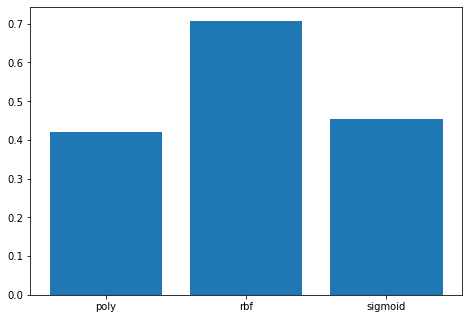

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([dic['kernel'] for dic in best_score],[dic['score'] for dic in best_score])
plt.show()

In [19]:
pd.DataFrame(best_score)

,kernel,score,params
0,poly,0.419444,"{'C': 53.821075955066966, 'gamma': 425.9568020..."
1,rbf,0.708333,"{'C': 89.593529467132, 'gamma': 484.3701547411..."
2,sigmoid,0.452778,"{'C': 188.88474765880682, 'gamma': 986.3697466..."


Vemos que el kernel que mejor se ajusta al modelo es el radial (rbf). Utilizaremos este kernel con sus correspondientes parámetros para entrenar el modelo predictivo

## Evaluating the Algorithm

In [20]:
from sklearn.metrics import accuracy_score

print("Valor óptimo para C: {}".format(best_score[1]['params']['C']))
print("Valor óptimo para gamma: {}".format(best_score[1]['params']["gamma"]))

modelSVM = svm.SVC(kernel=best_score[1]['kernel'], gamma=best_score[1]['params']["gamma"], C=best_score[1]['params']['C']).fit(X_train, y_train)
predict = modelSVM.predict(X_test)

accuracy = np.true_divide(np.sum(predict == y_test), predict.shape[0])*100
print("Precisión en el conjunto de test: {:.2f}%".format(accuracy))


Valor óptimo para C: 89.593529467132
Valor óptimo para gamma: 484.37015474111286
Precisión en el conjunto de test: 53.85%


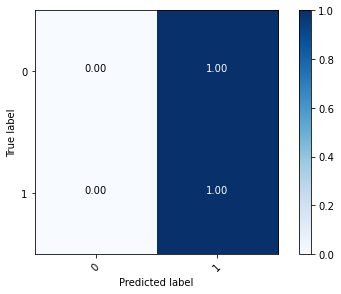

In [21]:
from sklearn.metrics import confusion_matrix
import itertools


cnf_matrix = confusion_matrix(y_test, predict)

def plot_confusion_matrix(cm, classes):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    cmap=plt.cm.Blues

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], ".2f"),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

n_classes=["0","1"]
plot_confusion_matrix(cnf_matrix, classes=n_classes)

# Run Prediction

In [22]:
result = modelSVM.predict(dfDataSetToPredict[[
    "pedido.data.attributes.age",
    "pedido.data.attributes.diagnostic_main",
    "respuesta.articlesRevisedYear",
    "respuesta.pubmed_keys",
    "articulo"
]])

result

array([1., 1., 1., ..., 1., 1., 1.])